In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.spatial import distance
import os


In [2]:
class arreglo2D_aleatorio_cm:
    def __init__(self,n,N):
        self.n=n
        self.N=N
        self.data=self.array()
        self.large = self.L()

    def L(self):
        return (self.N/self.n)**(1/2)

    def r(self):
        return float(np.sqrt(self.n)/2)
    
    def new_point(self):
        x=self.L()*(1-2*self.r()/self.L())*(random.random() - 1/2)
        y=self.L()*(1-2*self.r()/self.L())*(random.random() - 1/2)
        return (x,y)

    def array(self):
        
        Dat=[self.new_point()]
        
        i=0
        while len(Dat)<self.N:
            i = i+1
            x=self.L()*(1-2*self.r()/self.L())*(random.random() - 1/2)
            y=self.L()*(1-2*self.r()/self.L())*(random.random() - 1/2)
            Par=(x,y)
            Dat.append(Par) 
            for j in range(1,i+1):
                distancia=distance.euclidean(Par,Dat[i-j])
                if distancia < 2*self.r():
                    Dat.pop()
                    i=i-1
                    break
        return Dat

    def graph(self,data,title,size,c,contador,trazadora):
        color_pre=c
        plt.ioff()
        fig, ax = plt.subplots(figsize=(size,size))
        plt.xlim(-self.L()/2,self.L()/2)
        plt.ylim(-self.L()/2,self.L()/2)
        plt.grid(linestyle='--')
        ax.set_aspect(1)
        for i in range(0,len(data)):
            if i == trazadora:
                c="r"
            else:    
                c=color_pre
            circle1 = plt.Circle(data[i], self.r(), color=c)
            ax.add_artist(circle1)
            #ax.annotate(str(i), xy=data[i], fontsize=8)

        plt.title(title, fontsize=16)
        plt.savefig("./image/" + str(contador) + ".png")
        plt.close(fig)
        
    def graph_show(self,data,title):
        plt.ion()
        fig, ax = plt.subplots(figsize=(5,5))
        plt.xlim(-self.L()/2,self.L()/2)
        plt.ylim(-self.L()/2,self.L()/2)
        plt.grid(linestyle='--')
        ax.set_aspect(1)
        for i in range(0,len(data)):
            circle1 = plt.Circle(data[i], self.r(), color="r")
            ax.add_artist(circle1)
            #ax.annotate(str(i), xy=data[i], fontsize=8)

        plt.title(title, fontsize=16)
        plt.show
    
   



In [3]:
class arreglo2D_aleatorio_sm(arreglo2D_aleatorio_cm):
    def array(self):
         
        Dat=[( self.L()*(random.random() - 1/2) , self.L()(random.random() - 1/2))]
        i=0
        while len(Dat)<self.N:
            i = i+1
            x=self.L()*(random.random() - 1/2)
            y=self.L()*(random.random() - 1/2)
            Par=(x,y)
            Dat.append(Par)
            for j in range(1,i+1):
                distancia=distance.euclidean(Par,Dat[i-j])
                if distancia < 2 * self.r():
                    Dat.pop()
                    i=i-1
                    break
        return Dat


In [4]:
class arreglo2D_cuadrado(arreglo2D_aleatorio_cm):
    def array(self):
        i=0
        x=[]
        Nfinal = int(round(np.sqrt(self.N),0))
        for i in range(Nfinal):
            x.append(-self.L()/2+2*self.r()/2  +i*self.L()/(Nfinal))
        p=set([(i, j) for i in x for j in x])
        dat = list(p)
        return dat

In [5]:
print("¿Que tipo de configuración inicial desea?")
print("1.- Configuración aleatoria con margenes")
print("2.- Configuración aleatoria sin margenes")
print("3.- Configuración uniforme")

des= input("Escoja: ")


¿Que tipo de configuración inicial desea?
1.- Configuración aleatoria con margenes
2.- Configuración aleatoria sin margenes
3.- Configuración uniforme
Escoja: 1


In [6]:

class montecarlo2D(arreglo2D_aleatorio_cm):

    def mod_pot(self, distancia):
        if distancia < self.large/2 and distancia < 2*self.r():
            V =  1e10
        else:
            V = 0
        return V

    def sumaup(self,data):
        V = 0
        i=1
        m=0
        while i<len(data):
            for j in range(0,i):
                ri=np.array(data[i])
                rj=np.array(data[j])
                ri = ri - self.large*np.round(ri/self.large)
                rj = rj - self.large*np.round(rj/self.large)
                rij= ri - rj  
                distancia=np.linalg.norm(rij)
                Vij = self.mod_pot(distancia)
                if Vij > 75:
                    print(i,j)

                V = V + Vij
            i = i+1           
        return V

    def UP(self,i,ri,data):
        V = 0

        for j in range(0,len(data)):
            if i != j:
                ri = ri - self.large*np.round(ri/self.large)
                rj=np.array(data[j])
                rj = rj - self.large*(np.round(rj/self.large))
                rij= ri - rj  
                distancia=np.linalg.norm(rij)
                Vij = self.mod_pot(distancia)                
                V = V + Vij
        return V

    def algoritmo(self,NSTEP,R_MAX):        
        Ut_old = self.sumaup(self.data)
        i=0
        k=0
        data_new = np.array([self.data])
        p=[]
        while k<NSTEP:
            array1 = []
            i=0
            m=0
            while i < len(self.data):
                ri_old=data_new[k][i]
                Ui_old = self.UP(i,ri_old,data_new[k])
                ri_random = np.array((random.random()-0.5,random.random()-0.5))
                ri_new = ri_old + R_MAX*ri_random
                ri_new = ri_new + self.large*(-np.round(ri_new/self.large))
                array1.append(list(ri_new))
                Ui_new_1 = self.UP(i,ri_new,array1)
                Ui_new_2 = self.UP(i,ri_new,data_new[k])                
                delta_u = Ui_new_1 + Ui_new_2  - Ui_old
                print(k,i)
                if delta_u < 75 or delta_u <= 0:
                    pass
                elif np.exp(-delta_u) > random.random():
                    pass
                else:
                    m=m+1
                    i = i - 1
                    array1.pop(-1)
                i += 1
            data_new = np.append(data_new,[array1],axis=0) 
            k += 1
        return data_new

    def trazadora(self,data,rand):
        k=0
        i=0
        NSTEP=len(data)
        N=len(data[1])
        Path_traz=[]

        for k in range(NSTEP):
            for i in range(N):
                if i==rand:
                    Path_traz.append(data[k][i])

        return Path_traz

    def graph_traz(self,data):
        fig, ax = plt.subplots(figsize=(10,10))
        plt.ioff()
        plt.xlim(-self.L()/2,self.L()/2)
        plt.ylim(-self.L()/2,self.L()/2)
        plt.grid(linestyle='--')
        ax.set_aspect(1)
        for i in range(0,len(data)):
            c=((1,i/len(data),np.exp(-0.8*i/(len(data))),1))
            circle1 = plt.Circle(data[i], self.r()/10, color=c)
            ax.add_artist(circle1)
            #ax.annotate(str(i), xy=data[i], fontsize=8)

        plt.title("Trayectoria partícula trazadora", fontsize=16)
        plt.show()
        plt.close(fig)
        
    def animacion(self,data):
        
        for r in  range(len(data)):
            self.graph(data[r],str(r)+".png",10,"b",r,N_trazadora) 
        
        import glob
        from PIL import Image
        import os

        # filepaths
        fp_in = "./image/*.png"
        fp_out =  "simulacion_N="+str(self.N)+"_n="+str(self.n)+"_NSTEP="+str(NSTEP)+"_DMAX="+str(DMAX)+".gif"

        # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
        img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in), key=os.path.getmtime)]
        img.save(fp=fp_out, format='GIF', append_images=imgs,
                 save_all=True, duration=1000/24, loop=0)
        
        return fp_out
    
    def display_gif(self,fn):
        from IPython import display
        return display.HTML('<img src="{}">'.format(fn))
            

        



In [7]:
n=0.5
N=10
mama=montecarlo2D(n,N)
mama.L()


4.47213595499958

In [8]:
#n = input("Escribe n: ")
#N = input("Escribe N: ")
#NSTEP = input("Escribe NSTEP: ")
#DMAX = input("Escribe DMAX: ")
n=0.5
N=10
NSTEP=5
DMAX=0.2


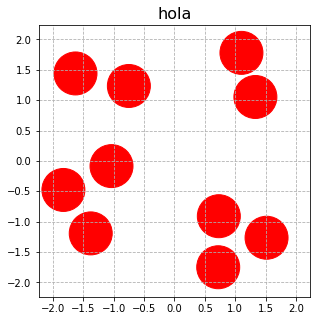

In [9]:
montecarlo = montecarlo2D(n,N)
montecarlo.graph_show(montecarlo.data,"hola")


In [10]:
configuracion=montecarlo.algoritmo(NSTEP,DMAX)
configuracion_inicial=configuracion[0]
configuracion_final=configuracion[-1]



0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 8
4 9


In [11]:
Potencial_final=montecarlo.sumaup(configuracion_final)
N_trazadora=random.randint(0,montecarlo.N-1)
N_trazadora

8

In [12]:
Path_traz=montecarlo.trazadora(configuracion,N_trazadora)

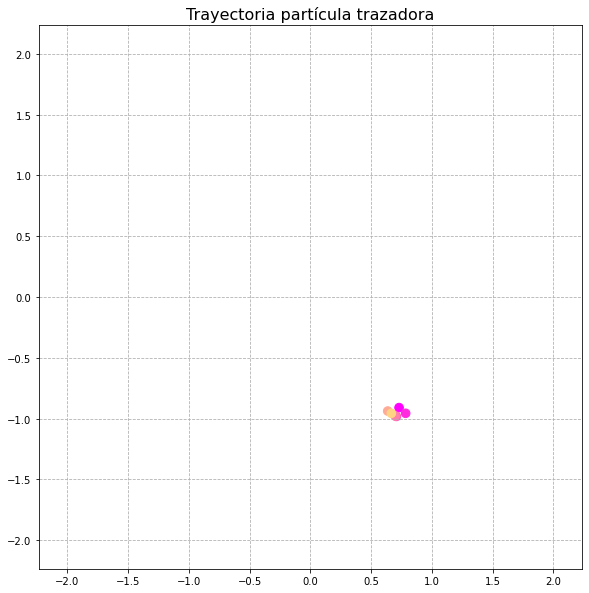

In [13]:
montecarlo.graph_traz(Path_traz)

In [14]:
fn = montecarlo.animacion(configuracion)

In [15]:
montecarlo.display_gif(fn)

In [16]:
montecarlo.display_gif("./image/0.png")


In [17]:
montecarlo.display_gif("./image/"+str(len(configuracion)-1)+".png")


In [18]:
os.popen('rm ./image/*.png').read()

''

In [19]:
class montecarlo2D_a_c3(arreglo2D_cuadrado,montecarlo2D):
    pass

In [20]:
montecarlo_cubico = montecarlo2D_a_c3(1,25)

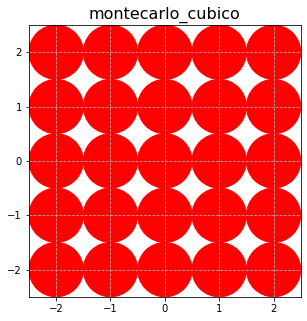

In [21]:
montecarlo_cubico.graph_show(montecarlo_cubico.data,"montecarlo_cubico")